In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Создание качественных датасетов

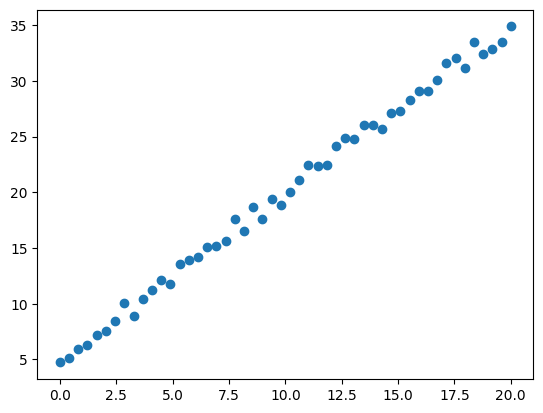

In [44]:
xs1 = np.linspace(0, 20, 50)
ys1 = 1.5 * xs1 + np.random.random(50) * 2 + 4

plt.scatter(xs1, ys1);

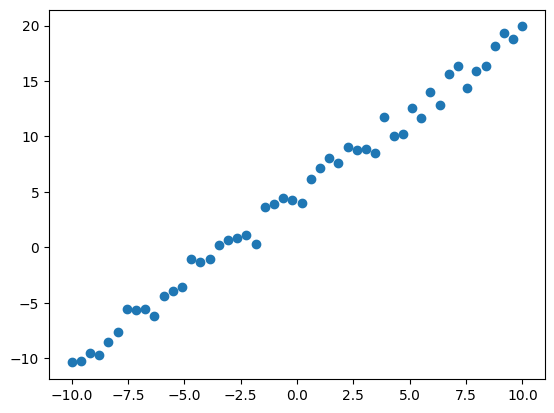

In [46]:
xs2 = np.linspace(-10, 10, 50)
ys2 = 1.5 * xs2 + np.random.random(50) * 3 + 3

plt.scatter(xs2, ys2);

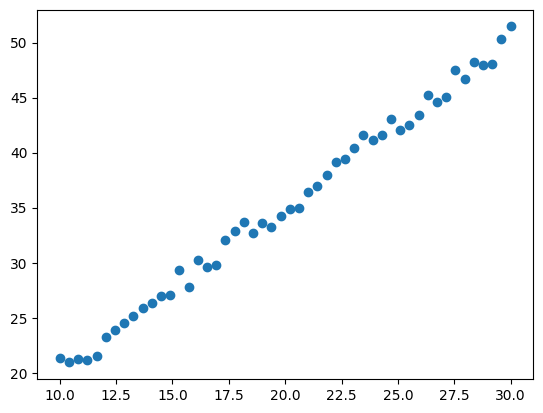

In [97]:
xs3 = np.linspace(10, 30, 50)
ys3 = 1.5 * xs3 + np.random.random(50) * 2.5 + 4

plt.scatter(xs3, ys3);

# Обучение модели линейной регрессии

MSE: 0.33
R2 score: 1.00
Coefficients: [1.5070953]


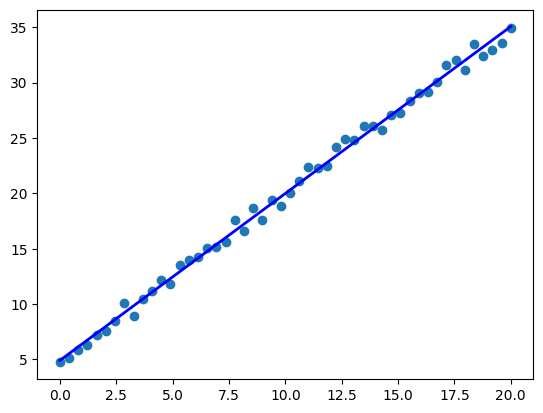

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(xs1.reshape(-1, 1), ys1)
pred1 = model.predict(xs1.reshape(-1, 1))

print("MSE: %.2f" % mean_squared_error(ys1, pred1))
print("R2 score: %.2f" % r2_score(ys1, pred1))
print("Coefficients:", model.coef_)

plt.scatter(xs1, ys1)
plt.plot(xs1.reshape(-1, 1), pred1, color="blue", linewidth=2);

np.savetxt("data/ys1.csv", ys1, delimiter=";")
np.savetxt("data/pred1.csv", pred1, delimiter=";")

MSE: 0.81
R2 score: 0.99
Coefficients: [1.5070953]


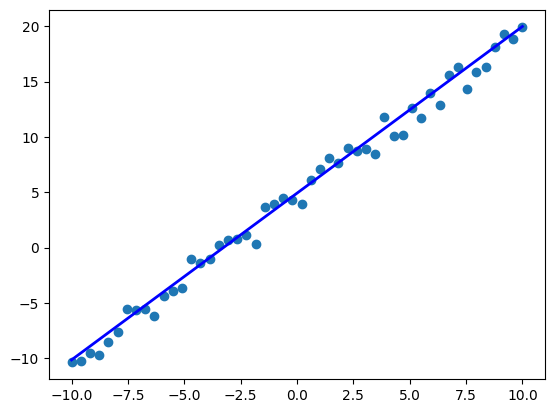

In [51]:
pred2 = model.predict(xs2.reshape(-1, 1))

print("MSE: %.2f" % mean_squared_error(ys2, pred2))
print("R2 score: %.2f" % r2_score(ys2, pred2))
print("Coefficients:", model.coef_)

plt.scatter(xs2, ys2)
plt.plot(xs2.reshape(-1, 1), pred2, color="blue", linewidth=2);

np.savetxt("data/ys2.csv", ys2, delimiter=";")
np.savetxt("data/pred2.csv", pred2, delimiter=";")

MSE: 0.53
R2 score: 0.99
Coefficients: [1.5070953]


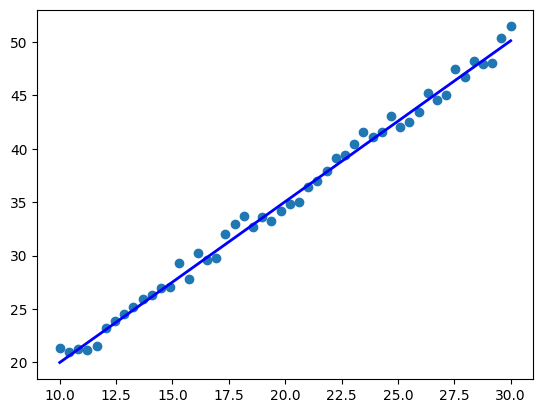

In [98]:
pred3 = model.predict(xs3.reshape(-1, 1))

print("MSE: %.2f" % mean_squared_error(ys3, pred3))
print("R2 score: %.2f" % r2_score(ys3, pred3))
print("Coefficients:", model.coef_)

plt.scatter(xs3, ys3)
plt.plot(xs3.reshape(-1, 1), pred3, color="blue", linewidth=2);

np.savetxt("data/ys3.csv", ys3, delimiter=";")
np.savetxt("data/pred3.csv", pred3, delimiter=";")

# Создание датасета с шумом

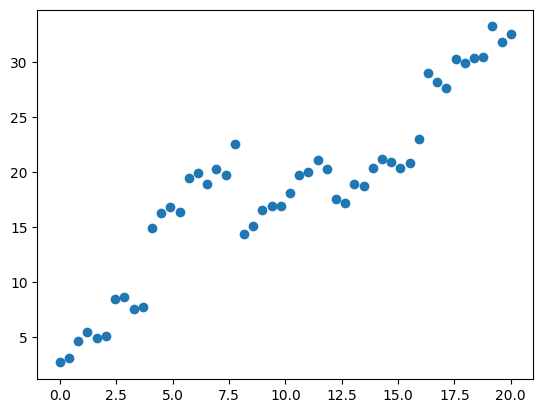

In [59]:
xs4 = np.linspace(0, 20, 50)
ys4 = 1.5 * xs4 + np.random.random(50) * 3 + 2
ys4[10: 20] += 6
ys4[30:40] -= 5

plt.scatter(xs4, ys4);

MSE: 15.03
R2 score: 0.77
Coefficients: [1.5070953]


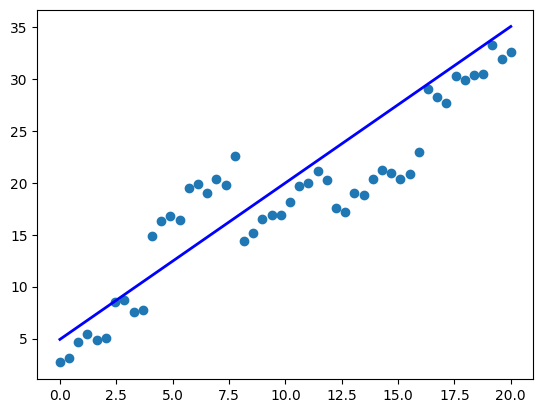

In [60]:
pred4 = model.predict(xs4.reshape(-1, 1))

print("MSE: %.2f" % mean_squared_error(ys4, pred4))
print("R2 score: %.2f" % r2_score(ys4, pred4))
print("Coefficients:", model.coef_)

plt.scatter(xs4, ys4)
plt.plot(xs4.reshape(-1, 1), pred4, color="blue", linewidth=2);

np.savetxt("data/ys4.csv", ys4, delimiter=";")
np.savetxt("data/pred4.csv", pred4, delimiter=";")

# Создание теста

In [63]:
! pip install pytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.2/339.2 kB 1.7 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: pluggy
    Found existing installation: pluggy 1.0.0
    Uninstalling pluggy-1.0.0:
      Successfully uninstalled pluggy-1.0.0

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Тест 1

In [100]:
%%writefile test_score1.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
    ys = np.loadtxt("data/ys1.csv", delimiter=";")
    return ys

@pytest.fixture()
def load_pred():
    pred = np.loadtxt("data/pred1.csv", delimiter=";")
    return pred

def test_mse(load_ys, load_pred):
    assert mean_squared_error(load_ys, load_pred) < 1
    
def test_r2(load_ys, load_pred):
    assert r2_score(load_ys, load_pred) > 0.9

Overwriting test_score1.py


In [101]:
!pytest -v test_score1.py

============================= test session starts ==============================
platform darwin -- Python 3.9.10, pytest-8.2.0, pluggy-1.5.0 -- /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9
cachedir: .pytest_cache
rootdir: /Users/gosha/Desktop/Мага/urfu_mlops/Automating_machine_learning/Module_5
plugins: anyio-3.6.2
collected 2 items                                                              

test_score1.py::test_mse PASSED                                          [ 50%]
test_score1.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.45s ===============================


## Тест 2

In [102]:
%%writefile test_score2.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
    ys = np.loadtxt("data/ys2.csv", delimiter=";")
    return ys

@pytest.fixture()
def load_pred():
    pred = np.loadtxt("data/pred2.csv", delimiter=";")
    return pred

def test_mse(load_ys, load_pred):
    assert mean_squared_error(load_ys, load_pred) < 1
    
def test_r2(load_ys, load_pred):
    assert r2_score(load_ys, load_pred) > 0.9

Overwriting test_score2.py


In [103]:
!pytest -v test_score2.py

============================= test session starts ==============================
platform darwin -- Python 3.9.10, pytest-8.2.0, pluggy-1.5.0 -- /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9
cachedir: .pytest_cache
rootdir: /Users/gosha/Desktop/Мага/urfu_mlops/Automating_machine_learning/Module_5
plugins: anyio-3.6.2
collected 2 items                                                              

test_score2.py::test_mse PASSED                                          [ 50%]
test_score2.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.45s ===============================


## Тест 3

In [104]:
%%writefile test_score3.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
    ys = np.loadtxt("data/ys3.csv", delimiter=";")
    return ys

@pytest.fixture()
def load_pred():
    pred = np.loadtxt("data/pred3.csv", delimiter=";")
    return pred

def test_mse(load_ys, load_pred):
    assert mean_squared_error(load_ys, load_pred) < 1
    
def test_r2(load_ys, load_pred):
    assert r2_score(load_ys, load_pred) > 0.9

Overwriting test_score3.py


In [105]:
!pytest -v test_score3.py

============================= test session starts ==============================
platform darwin -- Python 3.9.10, pytest-8.2.0, pluggy-1.5.0 -- /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9
cachedir: .pytest_cache
rootdir: /Users/gosha/Desktop/Мага/urfu_mlops/Automating_machine_learning/Module_5
plugins: anyio-3.6.2
collected 2 items                                                              

test_score3.py::test_mse PASSED                                          [ 50%]
test_score3.py::test_r2 PASSED                                           [100%]

============================== 2 passed in 0.39s ===============================


## Тест 4

In [106]:
%%writefile test_score4.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
    ys = np.loadtxt("data/ys4.csv", delimiter=";")
    return ys

@pytest.fixture()
def load_pred():
    pred = np.loadtxt("data/pred4.csv", delimiter=";")
    return pred

def test_mse(load_ys, load_pred):
    assert mean_squared_error(load_ys, load_pred) < 1
    
def test_r2(load_ys, load_pred):
    assert r2_score(load_ys, load_pred) > 0.9

Overwriting test_score4.py


In [107]:
!pytest -v test_score4.py

============================= test session starts ==============================
platform darwin -- Python 3.9.10, pytest-8.2.0, pluggy-1.5.0 -- /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9
cachedir: .pytest_cache
rootdir: /Users/gosha/Desktop/Мага/urfu_mlops/Automating_machine_learning/Module_5
plugins: anyio-3.6.2
collected 2 items                                                              

test_score4.py::test_mse FAILED                                          [ 50%]
test_score4.py::test_r2 FAILED                                           [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = array([ 2.6917324 ,  3.13501387,  4.6626293 ,  5.47834143,  4.90263356,
        5.09705217,  8.49313597,  8.67549635, ...662724, 27.72266027, 30.31833859, 29.92067171,
       30.40281421, 30.45381163, 33.2776806 , 31.90000025, 32.55588927])
load_pr